# 2. Add Two Numbers

You are given two non-empty linked lists representing two non-negative integers. The digits are stored in reverse order, and each of their nodes contains a single digit. Add the two numbers and return the sum as a linked list.

You may assume the two numbers do not contain any leading zero, except the number 0 itself.

 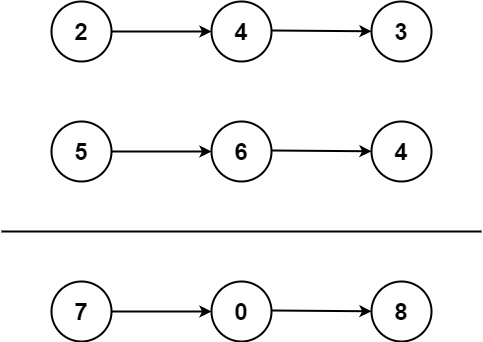

## Example 1:

```
Input: l1 = [2,4,3], l2 = [5,6,4]
Output: [7,0,8]
Explanation: 342 + 465 = 807.
```
## Example 2:
```
Input: l1 = [0], l2 = [0]
Output: [0]
```
## Example 3:
```
Input: l1 = [9,9,9,9,9,9,9], l2 = [9,9,9,9]
Output: [8,9,9,9,0,0,0,1]
```

## Constraints:

The number of nodes in each linked list is in the range [1, 100].
0 <= Node.val <= 9
It is guaranteed that the list represents a number that does not have leading zeros.

In [1]:
a = 12
print(a % 10)
print(int(a / 10))

2
1


In [2]:
class Node:
    def __init__(self, val=0, next=None):
        self.value = val
        self.next = next
        
class LinkedList:
    def __init__(self):
        self.head = None
        
    def display(self):
        value_list = []
        cur_node = self.head
        while cur_node:
            value_list.append(cur_node.value)
            cur_node = cur_node.next
        print(value_list)
        
    def get_list(self):
        value_list = []
        cur_node = self.head
        while cur_node:
            value_list.append(cur_node.value)
            cur_node = cur_node.next
        return value_list
        
    def append(self, value):
        # If the head is empty then set the new node
        if self.head is None:
            self.head = Node(value)
            return
        # Append to the end of the linked list
        new_node = Node(value)
        cur = self.head
        while cur.next is not None:
            cur = cur.next
        cur.next = new_node

In [3]:
def addTwoNumbers(l1, l2):
    main = LinkedList()
    curr_l1 = l1.head
    curr_l2 = l2.head
    remainder = 0
    while curr_l1 is not None and curr_l2 is not None:
        sum = curr_l1.value + curr_l2.value
        data = int(sum + remainder) % 10
        remainder = int(int(sum + remainder) / 10)
        main.append(data)
        curr_l1 = curr_l1.next
        curr_l2 = curr_l2.next
    while curr_l1 is not None:
        if curr_l2 is not None:
            sum = curr_l1.value + curr_l2.value
        else:
            sum = curr_l1.value
        data = int(sum + remainder) % 10
        remainder = int(int(sum + remainder) / 10)
        main.append(data)
        curr_l1 = curr_l1.next
    while curr_l2 is not None:
        if curr_l1 is not None:
            sum = curr_l1.value + curr_l2.value
        else:
            sum = curr_l2.value
        data = int(sum + remainder) % 10
        remainder = int(int(sum + remainder) / 10)
        main.append(data)
        curr_l2 = curr_l2.next
    main.append(remainder)
    return main.get_list()

In [4]:
# l1 = [2,4,3]
# l2 = [5,6,4]
# [7,0,8]

a = Node(2)
b = Node(4)
c = Node(3)
l1 = LinkedList()
l1.head = a
a.next = b
b.next = c

d = Node(5)
e = Node(6)
f = Node(4)
l2 = LinkedList()
l2.head = d
d.next = e
e.next = f

print(addTwoNumbers(l1, l2))

[7, 0, 8, 0]


In [5]:
a = Node(0)
b = Node(0)
l1 = LinkedList()
l1.head = a
l2 = LinkedList()
l2.head = b
print(addTwoNumbers(l1, l2))

[0, 0]


In [6]:
# l1 = [9,9,9,9,9,9,9]
# l2 = [9,9,9,9]
# [8,9,9,9,0,0,0,1]

l1 = LinkedList()
l1.append(9)
l1.append(9)
l1.append(9)
l1.append(9)
l1.append(9)
l1.append(9)
l1.append(9)
l1.display()

l2 = LinkedList()
l2.append(9)
l2.append(9)
l2.append(9)
l2.append(9)
l2.display()

print(addTwoNumbers(l1, l2))

[9, 9, 9, 9, 9, 9, 9]
[9, 9, 9, 9]
[8, 9, 9, 9, 0, 0, 0, 1]


## ListNode

In [7]:
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

In [10]:
def addTwoNumbers(l1, l2):
    head = None
    temp = None
    carry = 0
    # Loop for the two lists
    while l1 is not None or l2 is not None:
        # At the start of each iteration, we should add carry from the last iteration
        sum_value = carry
        # Since the lengths of the lists may be unequal, we are checking if the
        # current node is null for one of the lists
        if l1 is not None:
            sum_value += l1.val
            l1 = l1.next
        if l2 is not None:
            sum_value += l2.val
            l2 = l2.next
        # At this point, we will add the total sum_value % 10 to the new node
        # in the resultant list
        node = ListNode(sum_value % 10)
        # Carry to be added in the next iteration
        carry = sum_value // 10
        # If this is the first node or head
        if temp is None:
            temp = head = node
        # for any other node
        else:
            temp.next = node
            temp = temp.next
    # After the last iteration, we will check if there is carry left
    # If it's left then we will create a new node and add it
    if carry > 0:
        temp.next = ListNode(carry)
    return head

```java
class Solution {
public ListNode addTwoNumbers(ListNode node1, ListNode node2) {
        ListNode result = new ListNode(0);
        ListNode prev = result;
        int carryOut = 0;
        while (node1 != null || node2 != null) {
            int node2Value = 0;
            if (node2 != null) {
                node2Value = node2.val;
                node2 = node2.next;
            }
            int node1Value = 0;
            if (node1 != null) {
                node1Value = node1.val;
                node1 = node1.next;
            }
            int value = node1Value + node2Value + carryOut;
            carryOut = value / 10;
            value = value % 10;
            prev.next = new ListNode(value);
            prev = prev.next;
        }
        if (carryOut != 0) {
            prev.next = new ListNode(carryOut);
        }
        return result.next;
    }
}
```